In [157]:
import pandas as pd

# COVID-19

In [158]:
# Read

In [159]:
data = pd.read_csv('latest.csv')

In [161]:
data.Region_ID.unique()

array([18, 30,  1,  3, 11,  2,  9,  5, 25, 15,  7, 31, 17, 19, 22, 21, 10,
       14, 23,  4, 24, 12, 20,  8,  6, 26, 28, 13, 27, 16, 32, 29])

In [162]:
data.isnull().head(), data.isnull().tail()

(   Date_Confirmed  Date_Symptoms  Region  Region_ID  Region_Key  Origin  \
 0           False          False   False      False       False   False   
 1           False          False   False      False       False   False   
 2           False          False   False      False       False   False   
 3           False          False   False      False       False   False   
 4           False          False   False      False       False   False   
 
    Status  
 0   False  
 1   False  
 2   False  
 3   False  
 4   False  ,
        Date_Confirmed  Date_Symptoms  Region  Region_ID  Region_Key  Origin  \
 23437           False          False   False      False       False   False   
 23438           False          False   False      False       False   False   
 23439           False          False   False      False       False   False   
 23440           False          False   False      False       False   False   
 23441           False          False   False      False       

In [163]:
data.isnull().values.any()

False

In [164]:
data.isnull().values.sum()

0

In [165]:
#To use symptoms as indicator, uncomment the next two lines:
#data = data.drop(['Date_Confirmed'], axis=1)
#data = data.rename(columns={'Date_Symptoms':'Date_Confirmed'}) # Rename index

In [166]:
# Totals and delta

In [167]:
    # Region delta (ie, new cases)
cum_df = (data.groupby(['Region','Date_Confirmed'])['Date_Confirmed'].count()).to_frame()

In [168]:
    # Rename because duplicate index
cum_df['Region_Delta'] = cum_df['Date_Confirmed']

In [169]:
    # Region cumulative by date
cum_df['Region_Cumulative'] = cum_df.groupby(['Region'])['Region_Delta'].cumsum()

In [170]:
    # Clean up
cum_df = cum_df.drop(['Date_Confirmed'], axis=1)

In [171]:
# To view full table:
# from IPython.core.display import HTML
# display(HTML(cum_df.to_html()))

# Tables

In [172]:
# Read

In [173]:
pivot_tbl_cum = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Cumulative').T.reset_index()
pivot_tbl_daily = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Delta').T.reset_index()

In [174]:
# Save

In [175]:
pivot_tbl_cum.to_csv('time_series/total-mexico-covid19.csv', index=False)
pivot_tbl_daily.fillna(0).to_csv('time_series/daily-mexico-covid19.csv', index=False)

In [176]:
# Set datetime

In [177]:
pivot_tbl_cum['Date_Confirmed'] = pd.to_datetime(pivot_tbl_cum.Date_Confirmed, format='%Y-%m-%d')
pivot_tbl_cum['Date_Confirmed'] = pivot_tbl_cum['Date_Confirmed'].dt.strftime('%Y-%m-%d')

In [178]:
# Set datetime

In [179]:
pivot_tbl_daily['Date_Confirmed'] = pd.to_datetime(pivot_tbl_daily.Date_Confirmed, format='%Y-%m-%d')
pivot_tbl_daily['Date_Confirmed'] = pivot_tbl_daily['Date_Confirmed'].dt.strftime('%Y-%m-%d')

In [180]:
# Set index

In [181]:
pivot_tbl_cum = pivot_tbl_cum.set_index(pd.DatetimeIndex(pivot_tbl_cum['Date_Confirmed']))
pivot_tbl_daily = pivot_tbl_daily.set_index(pd.DatetimeIndex(pivot_tbl_daily['Date_Confirmed']))

# Plots

In [182]:
from numpy import *
import math
import matplotlib.pyplot as plt

### Confirmed cases

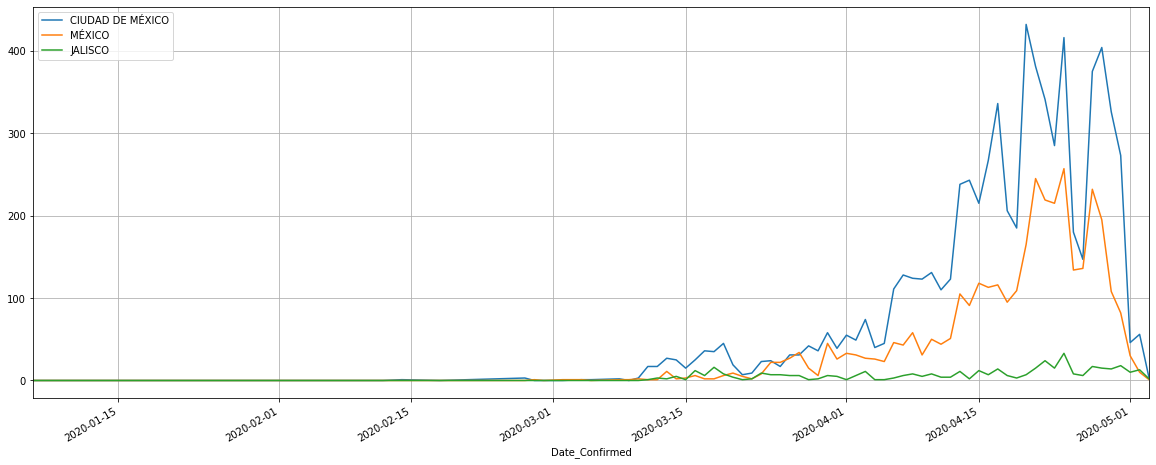

In [187]:
plt.figure(figsize=(20,8))

for state in ['CIUDAD DE MÉXICO', 'MÉXICO', 'JALISCO',]:
    pivot_tbl_daily[state].fillna(0).plot()

plt.legend()
plt.grid(True)
plt.show()

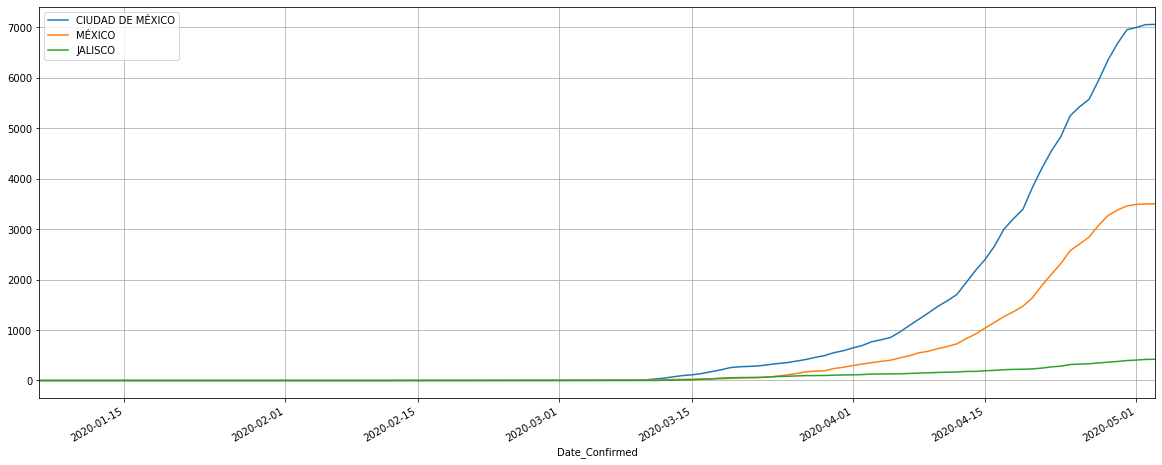

In [188]:
plt.figure(figsize=(20,8))

for state in ['CIUDAD DE MÉXICO', 'MÉXICO', 'JALISCO',]:
    pivot_tbl_daily[state].fillna(0).cumsum().plot()

plt.legend()
plt.grid(True)
plt.show()

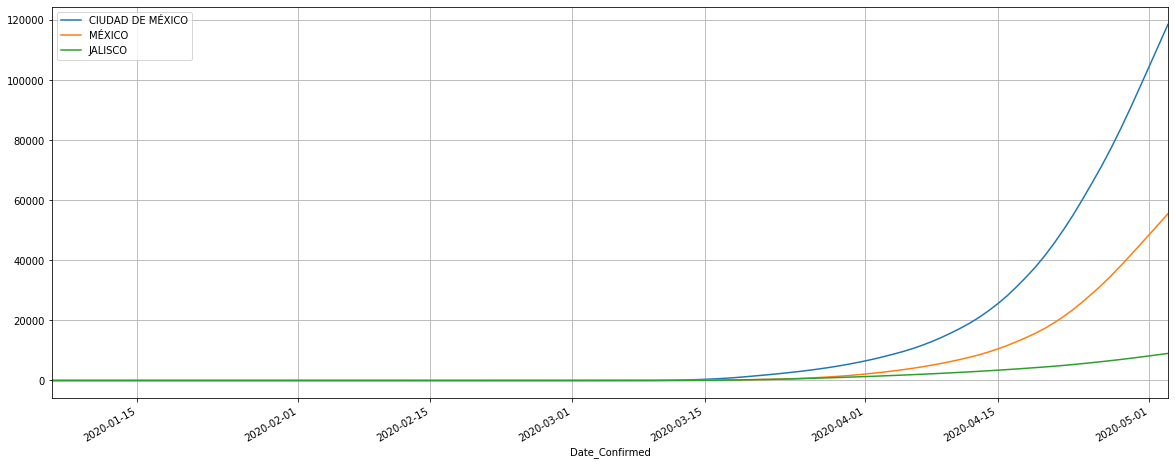

In [189]:
plt.figure(figsize=(20,8))

for state in ['CIUDAD DE MÉXICO', 'MÉXICO', 'JALISCO',]:
    pivot_tbl_cum[state].fillna(0).cumsum().plot()

plt.legend()
plt.grid(True)
plt.show()

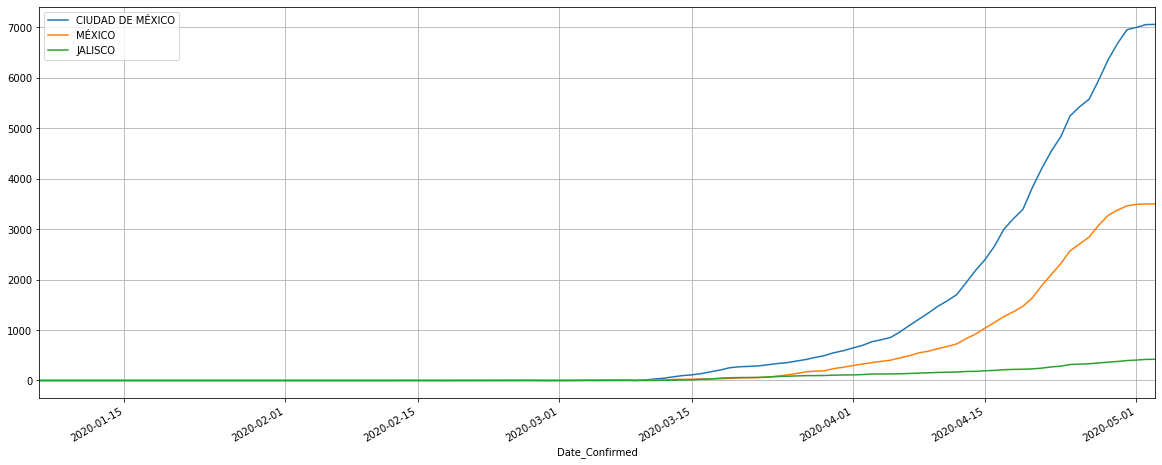

In [134]:
plt.figure(figsize=(20,8))

for state in ['CIUDAD DE MÉXICO', 'MÉXICO', 'JALISCO',]:
    pivot_tbl_cum[state].fillna(0).plot()

plt.legend()
plt.grid(True)
plt.show()

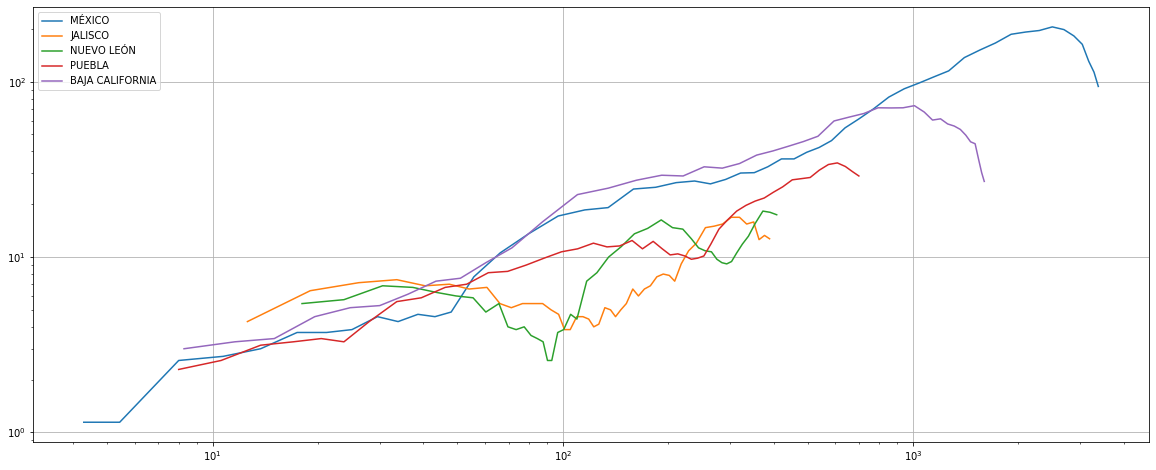

In [135]:
plt.figure(figsize=(20,8))

for state in ['MÉXICO', 'JALISCO', 'NUEVO LEÓN', 'PUEBLA', 'BAJA CALIFORNIA']:
    plt.plot(list(pivot_tbl_cum[state].dropna().rolling(window=7).mean()), list(pivot_tbl_daily[state].dropna().rolling(window=7).mean()), label=state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

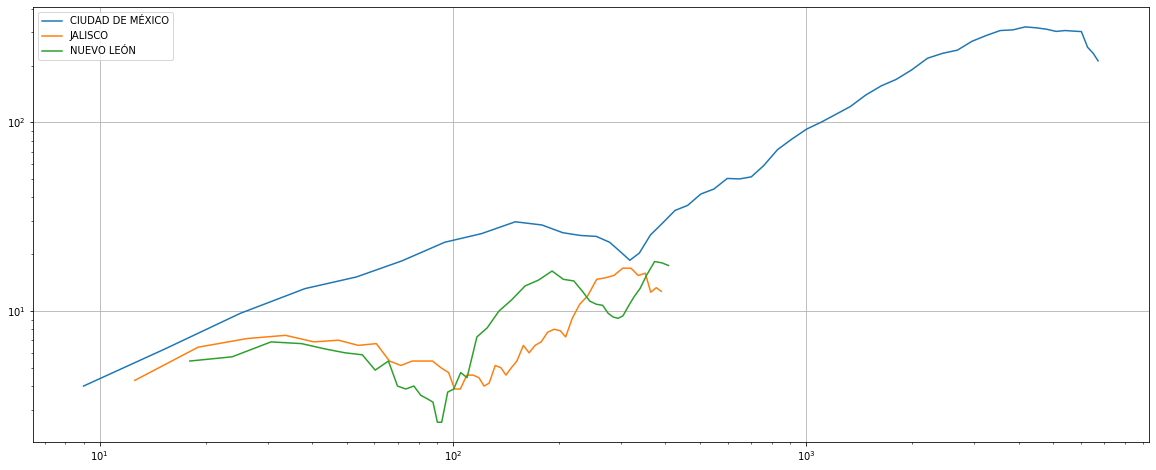

In [190]:
plt.figure(figsize=(20,8))

for state in ['CIUDAD DE MÉXICO', 'JALISCO', 'NUEVO LEÓN']:
    plt.plot(list(pivot_tbl_cum[state].dropna().rolling(window=7).mean()), list(pivot_tbl_daily[state].dropna().rolling(window=7).mean()), label = state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

### Lag in cases reported

In [191]:
import janitor
test = pivot_tbl_daily
abr_19 = test.filter_date('Date_Confirmed','2020-02-01','2020-04-19')

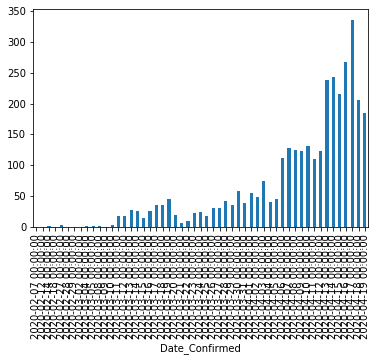

In [192]:
abr_19['CIUDAD DE MÉXICO'].plot(kind='bar', title='')